# SQL Server Lab with MultiSubnet Failover Clustering with AG

> ### Practice Makes Perfect

# Table of Content

## Day 01

1. Basics of Oracle VM VirtualBox Manager
    
    - Preferences
        - Extensions
        - Default Machine Folder
    - Host Network Manager
        - Create HostOnly Adapter for Subnet 192.168.56.0/24
        - Create HostOnly Adapter for Subnet 192.168.57.0/24
2. Create VM - DC2
    
    - Settings
        
        - General
            
            - Basic
                - Name - DC2
                - Version (OS) - Windows Server 2019 DomainCenter (64-bit)
            - Advanced
                - Shared Clipboard - Bidirectional
                - Drag'n'Drop - Bidirectional
        - System
            
            - Motherboard
                - Base Memory (RAM) - 2048 MB
                - Boot Order
                    1. Optical
                    2. Hard Disk
            - Processor
                - Processor(s) - 2 CPU
        - Storage
            
            - Storage Devices
                - Controller: SATA
                    1. DC2.vdi
                        - Size - 80 GB
                        - Dynamic Disk
                    2. Optical Drive
                    3. DC2\_SAN.vdi
                        - Size - 500 GB
                        - Dynamic Disk
        - Network
            
            1. Adapter 1
                
                - Host-only Adapter
                - Subnet 192.168.56.0/24
            2. Adapter 2
                
                - Host-only Adapter
                - Subnet 192.168.57.0/24
            3. Adapter 3
                
                > After OS is successfully installed
                
                - Bridged Adapter with Static IP from Router
        - Shared Folders
            
            - Your software/scripts path with 'Full' access and 'Auto Mount' at **Z:** drive
3. Install Windows Server 2019 on DC2 VM
    
4. Prepare DC2 VM for Domain Controller
    
    1. Rename computer to DC2.Lab.local & reboot
        
    2. Set Static IP with network adapters
        
        - Network and Settings \> Change adapter Options
            
            > Make sure to MATCH MAC Address in OS with MAC address of VM Adapter Settings
            
        - Adapter 1
            
            - IP address: 192.168.56.10
            - Subnet mask: 255.255.255.0
            - Default gateway: **blank**
            - Preferred DNS server: 127.0.0.1
        - Adapter 2
            
            - IP address: 192.168.57.10
            - Subnet mask: 255.255.255.0
            - Default gateway: **blank**
            - Preferred DNS server: 127.0.0.1
        - Apater 3 (Bridged)
            - Set static Ip address from router itself by MAC address binding

    3. Add roles and features
        
        - Active Directory Domain Services
        - Active Directory Lightweight Directory Services
        - DNS Server
        - File and Storage Services
            - File and iSCSI Services
                - File Server
                - iSCSI Target Server
                - iSCSI Target Storage Provider (VDS and VSS \*\*)
            - Storage Services
        - Remote Access
            - DirectAccess and VPN
            - Routing
        - .NET Framework 3.5 Features
        - .NET Framework 4.7 Features
        - .Failover Clustering
        - Remote Server Administration Tools
        - Telnet Client
    4. Configure Active Directory Domain Services
        
        1. Install ad domain services
            
        2. Create Active Directory Users
            
            - Lab\\SQLDBA
                - Member of 'Domain Admins', 'Enterprise Admins', 'Schema Admins' & 'Administrators'
            - Lab\\SQLServices
                - Member of Lab\\SQLDBA
            - Lab\\adwivedi
                - Member of Lab\\SQLDBA
        3. On DNS Manager, create Primary reverse lookup zone
            
            - For subnet 192.168.56.x
                
                > Create a primary reverse lookup zone for the subnet 192.168.56.x. Ensure that the zone is stored within AD DS and is replicated to all DNS servers running on domain controllers in the forest.\`
                
            - For subnet 192.168.57.x
                
                > Create a primary reverse lookup zone for the subnet 192.168.57.x. Ensure that the zone is stored within AD DS and is replicated to all DNS servers running on domain controllers in the forest.
                
    5. Open firewall rules with name like 'Virtual Machine Monitoring \*\*'
        
    6. ~Install VirtualBox Guest Addition Extension~
        
5. Setup Routing b/w Subnets 192.168.56.x & 192.168.57.x
    
    > [sqlshack.com - Blog Post - Simulating a Multi Subnet cluster for setting up SQL Server Always On Availability Groups – lab setup](https://www.sqlshack.com/simulating-a-multi-subnet-cluster-for-setting-up-sql-server-always-on-availability-groups-lab-setup/)
    
    1. Open Routing and remote access config tool; right click on the root node and select “Enable and Configure Routing and remote access”.
    2. Click next and select custom configuration and choose “LAN Routing”.
    3. Click Next, finish and start the service.
    4. On MMC window that opened, navigate to IPV4 section and under General right click and select “new routing protocol” and select “RIP Version 2 for Internet Protocol”. Finish.
    5. By now, "RIP" sub section is added under IPv4.
    6. Right click on the RIP under Ipv4 and select new Interface and select a NIC. Click "OK" and accept defaults on RIP Properties window.
    7. Repeat the same process for your second host only NIC.
    8. Repeat the same for bridged adapter NIC
    9. With above steps, now, machine DC2.Lab.local will act as a router b/w subnets just using windows routing feature.
6. Create VM - Workstation
    
    > We use this machine to perform DBA task. Similar to office desktop/latpop.
    
    - Settings
        
        - General
            
            - Basic
                - Name - Workstation
                - Version (OS) - Windows 10 (64-bit)
            - Advanced
                - Shared Clipboard - Bidirectional
                - Drag'n'Drop - Bidirectional
        - System
            
            - Motherboard
                - Base Memory (RAM) - 5120 MB
                - Boot Order
                    1. Optical
                    2. Hard Disk
            - Processor
                - Processor(s) - 2 CPU
        - Storage
            
            - Storage Devices
                - Controller: SATA
                    1. DC.vdi
                        - Size - 150 GB
                        - Dynamic Disk
                    2. Optical Drive
                    3. Workstation\_E\_Drive.vdi
                        - Size - 50 GB
                        - Dynamic Disk
                    4. Workstation\_SQL.vdi
                        - Size - 50 GB
                        - Dynamic Disk
        - Network
            
            1. Adapter 1
                
                - Host-only Adapter
                - Ipv4/Subnet - **192.168.56**.51/24
                - Gateway - 192.168.56.10 (DC2.Lab.local ip)
                - DNS - 192.168.56.10 (DC2.Lab.local ip)
            2. Adapter 2
                
                > After OS is successfully installed
                
                - NAT
    - Install VirtualBox Guest Addition Extension
        
    - Set IPv4 address to 192.168.56.51
        
    - Rename to Workstation. Reboot.
        
    - Add to domain Lab.local
        
    - Install other softwares like SSMS, VS Code, RSAT Tools etc
        
    - Test Connectivity from HOST machine & Workstation

## Day 02

### Create VMs for SQL Server

1. Create MSSQLPROD-A (192.168.56.11) & MSSQLPROD-B (192.168.56.12) on Primary subnet
2. Create MSSQLDR-A (192.168.57.11) & MSSQLDR-B (192.168.57.12) on DR subnet
3. C:\\ drive - 50 gb
4. Join all machines to AD and WSFC MSSQLCluster.Lab.local (192.168.56.21, 192.168.57.21)
5. Quorum -\> Disk Witness

#### Bridged Apapter Config
Set some IP address, but keep gateway to DC IP of same subnet. DNS should reflect 8.8.8.8 & 8.8.4.4

### Create MSSQLShare.Lab.local (File Server)

1. MSSQLShare.Lab.local (192.168.56.22, 192.168.57.22)
2. Type -\> File Server
3. Preferred Owners -\> All Prod/Drs
4. S:\\ (100gb), S:\\Backup01 (20gb), S:\\Backup02 (20gb)
5. Validate \\\\MSSQLShare\\Backup01\\
6. Failover Role to other nodes for validation

#### NOTE - Follow below steps for adding disk to Cluster 
1. Make sure MPIO feature is installed on each Cluster Node
2. Match LUN between SAN and Node where disks are to be brought online
3. Bring Disks online & Initialize only. DON'T create volume
4. Add disks as Available Storage on cluster
5. Rename disks and add dependency on mounted volumes for base drive
6. Assign disks to cluster role one by one
7. Change cluster role preferred owners appropriately
8. Set Base Drive Possible Owners appropriately
9. To assign drive letter/mounted volume
    - First set cluster disk on maintenance
    - Create & format volume without assigning any drive letter
    - Remove from maintenance
    - From disk management, assign drive letter, or create mounted volume

## Day 03

### Create role 'SQL Server (PROD1)'

1. E:\\ (Prod-E-Drive, 10 gb)
2. E:\\Data\\ (Prod-E-Data, 20 gb)
3. E:\\Log\\ (Prod-E-Log, 5 gb)
4. E:\\TempDb\\ (Prod-E-TempDb, 6 gb)
5. Preferred Owners -\> MSSQLPROD-A & MSSQLPROD-B

### Create role 'SQL Server (DR1)'

1. E:\\ (Dr-E-Drive, 10 gb)
2. E:\\Data\\ (Dr-E-Data, 20 gb)
3. E:\\Log\\ (Dr-E-Log, 5 gb)
4. E:\\TempDb\\ (Dr-E-TempDb, 6 gb)
5. Preferred Owners -\> MSSQLDR-A & MSSQLDR-B

### Create role 'SQL Server (PROD2)'

1. E:\\ (Prod-F-Drive, 10 gb)
2. E:\\Data\\ (Prod-F-Data, 20 gb)
3. E:\\Log\\ (Prod-F-Log, 5 gb)
4. E:\\TempDb\\ (Prod-F-TempDb, 6 gb)
5. Preferred Owners -\> MSSQLPROD-A & MSSQLPROD-B

### Create role 'SQL Server (DR2)'

1. E:\\ (Dr-F-Drive, 10 gb)
2. E:\\Data\\ (Dr-F-Data, 20 gb)
3. E:\\Log\\ (Dr-F-Log, 5 gb)
4. E:\\TempDb\\ (Dr-F-TempDb, 6 gb)
5. Preferred Owners -\> MSSQLDR-A & MSSQLDR-B

## Day 04

### Install fci mssqlprod1.lab.local

1. Network Name -\> MSSQLProd1.Lab.local (192.168.56.23)
2. Nodes -\> MSSQLProd-A\\Prod1, MSSQLProd-B\\Prod1
3. Disks -\> Resource Group 'SQL Server (PROD1)'

Execute below PowerShell commands to add firewall exceptions -

```
netsh advfirewall firewall set rule group=”network discovery” new enable=yes
netsh advfirewall firewall set rule group=”virtual machine monitoring” new enable=yes
netsh advfirewall firewall add rule name="Microsoft iSCSI Software Target Service-TCP-3260" dir=in action=allow protocol=TCP localport=3260
netsh advfirewall firewall add rule name="Microsoft iSCSI Software Target Service-TCP-135" dir=in action=allow protocol=TCP localport=135
New-NetFirewallRule -DisplayName "Sql Server (TCP/1433)" -Direction Inbound -LocalPort 1433 -Protocol TCP -Action Allow -Profile Any
New-NetFirewallRule -DisplayName "SQL Browser (UDP/1434)" -Direction Inbound -LocalPort 1434 -Protocol UDP -Action Allow -Profile Any
New-NetFirewallRule -DisplayName "SQL DAC (TCP/1434)" -Direction Inbound -LocalPort 1434 -Protocol TCP -Action Allow -Profile Any
New-NetFirewallRule -DisplayName "Sql Server HADR (TCP/5022)" -Direction Outbound -LocalPort 5022 -Protocol TCP -Action Allow -Profile Any

```

### Issue/Fix - Below error is received since Data, Log, TempDb are directly under Mount Points

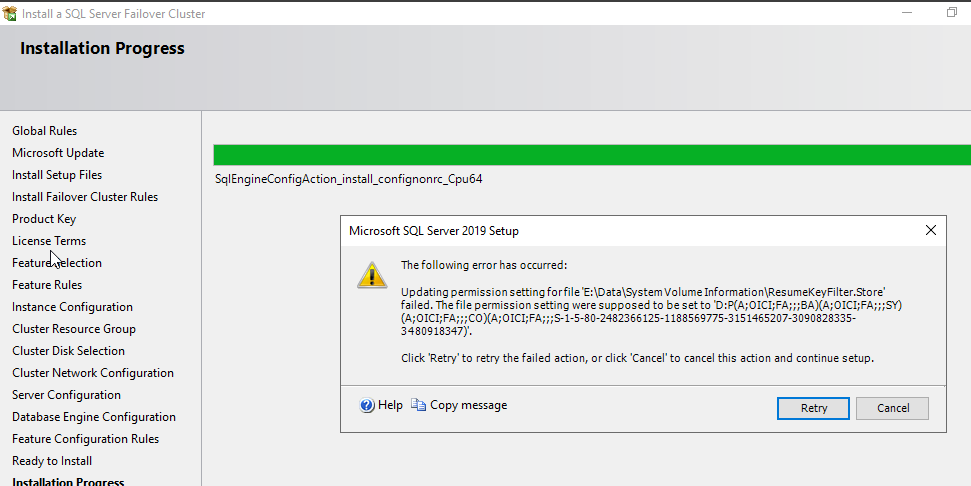

#### Solution - Execute below in Elevated powershell to transfer ownership to Admins

```
takeown --% /f "E:\Data" /r /d y /a
takeown --% /f "E:\Log" /r /d y /a
takeown --% /f "E:\TempDb" /r /d y /a
```

### Install fci mssqldr1.lab.local

1. Network Name -\> MSSQLDr1.Lab.local (192.168.57.23)
2. Nodes -\> MSSQLDr-A\\Dr1, MSSQLDr-B\\Dr1
3. Disks -\> Resource Group 'SQL Server (DR1)'

### Install fci mssqlprod2.lab.local

1.  Network Name -> MSSQLProd2.Lab.local (192.168.56.24)
2.  Nodes -> MSSQLProd-A\Prod2, MSSQLProd-B\Prod2
3.  Disks -> Resource Group 'SQL Server (PROD2)'

### Install fci mssqldr2.lab.local

1. Network Name -\> MSSQLDr2.Lab.local (192.168.57.24)
2. Nodes -\> MSSQLDr-A\\Dr2, MSSQLDr-B\\Dr1
3. Disks -\> Resource Group 'SQL Server (DR2)'

  

Incase failover of SqlCluster fails to other nodes due to improper preferred/possible owners, below scripts can be used for same -

  

```
# Failover & Set Preferred Owner (Single/Multi)
$Error.Clear()

# SqlProd- Cluster Parameters
$ProdSqlInstances = 1..3 | % {"SqlProd$_"}
$ProdNodes = @('A','B','C') | % {"SqlProd-$_"}
$DrSqlInstances = 1..3 | % {"SqlDr$_"}
$DrNodes = @('A','B','C') | % {"SqlDr-$_"}
$SqlInstances = $ProdSqlInstances + $DrSqlInstances
$Nodes = $ProdNodes + $DrNodes
$ClusterName = 'SqlCluster'

$clus = Get-Cluster -Name $ClusterName
$clusGroup = $clus | Get-ClusterGroup | ? {$_.Name -like 'SqlProd3*'}

# Info
$clusGroup.Name # Cluster Group Name
$clusGroup.OwnerNode.Name # Owner

# Move to other node
$clusGroup | Move-ClusterGroup -Node 'SqlProd-A'

# Set Preferred Owners & Possible Owners
$clusGroup | Set-ClusterOwnerNode -Owners $ProdNodes -ErrorAction Stop
$clusGroup | Get-ClusterResource | Set-ClusterOwnerNode -Owners $ProdNodes
```

## Day 05

### Setup availability group mssqlprod1ag1
1.  Replicas -> MSSQLProd1\Prod1, MSSQLDr1\Dr1
2.  Listener -> mssqlprod1ag1 (192.168.56.31, 192.168.57.31)

### Setup availability group mssqlprod2ag\*

1. Replicas -\> MSSQLProd2\\Prod2, MSSQLDr2\\Dr2
2. Listener -\> mssqlprod2ag1 (192.168.56.32, 192.168.57.32)
3. Listener -\> mssqlprod2ag2 (192.168.56.33, 192.168.57.33)
4. Listener -\> mssqlprod2ag3 (192.168.56.34, 192.168.57.34)

## Day 06

### Transactional Replication with Remote Distributor Ag
1.  